In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
data = pd.read_csv('dataTrain_carListings.csv')

# Convertir las variables categóricas en variables dummy
data_dummies = pd.get_dummies(data, columns=['State', 'Make', 'Model'], drop_first=True)

# Separar las características (X) y el objetivo (y)
X = data_dummies.drop('Price', axis=1)
y = data_dummies['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Predecir los precios en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')
print(f'Coeficiente de determinación R^2: {r2}')


Error cuadrático medio: 19304358.45266984
Coeficiente de determinación R^2: 0.8331448527099874


Modelo Logistico

In [6]:
# Calcular la mediana del precio
median_price = data['Price'].median()

# Crear una nueva columna binaria
data['PriceAboveMedian'] = (data['Price'] > median_price).astype(int)

# Convertir las variables categóricas en variables dummy
data_dummies = pd.get_dummies(data.drop('Price', axis=1), columns=['State', 'Make', 'Model'], drop_first=True)

# Separar las características (X) y el objetivo (y)
X = data_dummies.drop('PriceAboveMedian', axis=1)
y = data_dummies['PriceAboveMedian']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predecir en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Informe de clasificación:\n{class_report}')

Precisión: 0.675875
Matriz de confusión:
[[23311 16900]
 [ 9030 30759]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64     40211
           1       0.65      0.77      0.70     39789

    accuracy                           0.68     80000
   macro avg       0.68      0.68      0.67     80000
weighted avg       0.68      0.68      0.67     80000



Redes de regresión

In [9]:
# Convertir las variables categóricas en variables dummy
data_dummies = pd.get_dummies(data, columns=['State', 'Make', 'Model'], drop_first=True)

# Separar las características (X) y el objetivo (y)
X = data_dummies.drop('Price', axis=1)
y = data_dummies['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Crear el modelo de la red neuronal
model = Sequential()

# Añadir capas
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Salida de una sola neurona para regresión

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


In [11]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
8000/8000 [==============================] - 35s 4ms/step - loss: 53767092.0000 - mean_absolute_error: 4810.8560 - val_loss: 15462634.0000 - val_mean_absolute_error: 2504.2036
Epoch 2/50
8000/8000 [==============================] - 33s 4ms/step - loss: 29972002.0000 - mean_absolute_error: 3830.7234 - val_loss: 14067463.0000 - val_mean_absolute_error: 2391.3958
Epoch 3/50
8000/8000 [==============================] - 30s 4ms/step - loss: 28817876.0000 - mean_absolute_error: 3752.3125 - val_loss: 13592030.0000 - val_mean_absolute_error: 2342.5366
Epoch 4/50
8000/8000 [==============================] - 33s 4ms/step - loss: 27881904.0000 - mean_absolute_error: 3670.9617 - val_loss: 14061773.0000 - val_mean_absolute_error: 2334.1428
Epoch 5/50
8000/8000 [==============================] - 33s 4ms/step - loss: 27163040.0000 - mean_absolute_error: 3591.6023 - val_loss: 14017687.0000 - val_mean_absolute_error: 2365.9084
Epoch 6/50
8000/8000 [==============================] - 37s 5ms/s

In [1]:
# Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

NameError: name 'mean_squared_error' is not defined

In [15]:
import matplotlib.pyplot as plt

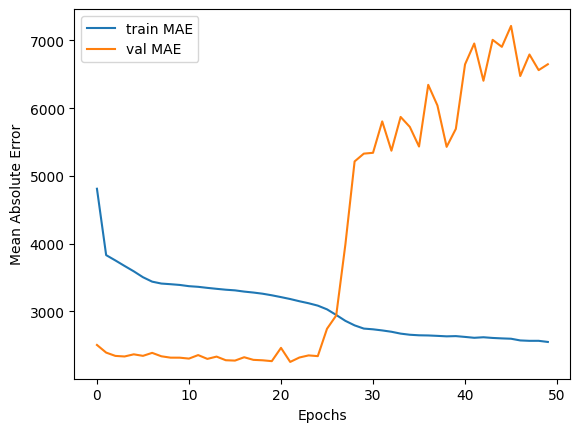

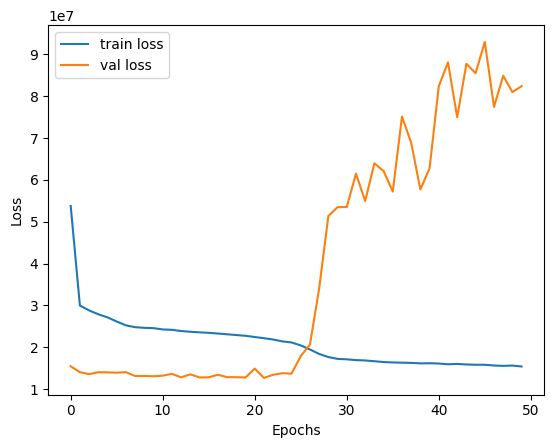

In [16]:
# Gráfica de precisión del entrenamiento y validación
plt.plot(history.history['mean_absolute_error'], label='train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Gráfica de pérdida del entrenamiento y validación
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('dataTrain_carListings.csv')
df

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler
...,...,...,...,...,...,...
399995,29900,2015,25287,TX,Lexus,RXRX
399996,17688,2015,17677,MI,Chevrolet,EquinoxFWD
399997,24907,2014,66688,NC,Buick,EnclaveLeather
399998,11498,2014,37872,IN,Volkswagen,Jetta


In [ ]:
# Filtrar los datos para seleccionar solo los carros de marca Honda
df = df[df['Make'] == 'Honda']

# Filtrar los datos para seleccionar los carros del año 2015 o más recientes
df= df[df['Year'] >= 2010]
df

,Price,Year,Mileage,State,Make,Model
28,22883,2016,20969,OH,Honda,Accord
34,17589,2014,39665,FL,Honda,CR-VEX-L
79,14999,2016,36237,GA,Honda,Civic
92,19874,2015,24390,MA,Honda,AccordEX-L
104,14881,2015,28760,FL,Honda,Civic
...,...,...,...,...,...,...
399891,23995,2015,22231,CT,Honda,PilotLX
399897,28584,2015,28668,FL,Honda,OdysseyTouring
399915,16987,2014,56802,IN,Honda,CR-VEX
399917,16992,2014,30115,CA,Honda,Accord


In [ ]:
df['campo_unido'] = df['Make'] + ' ' + df['Model']

In [ ]:
label_encoder = LabelEncoder()
df['Make_encoded'] = label_encoder.fit_transform(df['campo_unido'])

In [ ]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['Make', 'Make_encoded','State','Model','campo_unido'], axis=1)  # Características
y = df['Make_encoded']  # Etiquetas codificadas

In [ ]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
X = scaler.fit_transform(X)



In [ ]:
print(X)

[[ 0.74440309  1.17983899 -0.78726194]
 [-0.13071794 -0.01040716 -0.16070925]
 [-0.55885611  1.17983899 -0.27559065]
 ...
 [-0.23023114 -0.01040716  0.4135972 ]
 [-0.22940462 -0.01040716 -0.48075516]
 [ 1.54001276 -0.01040716 -0.47794009]]


In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
print(y)

28         0
34         9
79        13
92         2
104       13
          ..
399891    29
399897    24
399915     8
399917     0
399984    28
Name: Make_encoded, Length: 28592, dtype: int64


In [ ]:
# Verifica la distribución de las clases
print(pd.Series(y_train).value_counts())

Make_encoded
0     5095
13    4102
9     1827
10    1298
22    1233
8     1144
16    1106
28     961
2      834
3      672
24     575
26     438
14     428
31     405
25     300
7      248
1      247
21     230
29     217
27     181
6      159
15     158
17     154
11     154
30     127
23     119
20     106
32     105
4       75
33      63
12      47
5       46
19      11
18       8
Name: count, dtype: int64


In [ ]:
# Definir el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Configurar el optimizador con una tasa de aprendizaje específica
learning_rate = 0.05
optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               512       
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 34)                2210      
                                                                 
Total params: 10978 (42.88 KB)
Trainable params: 10978 (42.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
16/16 [==============================] - 2s 61ms/step - loss: 3.0723 - accuracy: 0.2217 - val_loss: 2.4473 - val_accuracy: 0.3235
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 2.3643 - accuracy: 0.3173 - val_loss: 2.1719 - val_accuracy: 0.3414
Epoch 3/100
16/16 [==============================] - 0s 12ms/step - loss: 2.1926 - accuracy: 0.3420 - val_loss: 2.0560 - val_accuracy: 0.3760
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 2.1384 - accuracy: 0.3491 - val_loss: 2.0240 - val_accuracy: 0.3704
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 2.0971 - accuracy: 0.3613 - val_loss: 2.0052 - val_accuracy: 0.3785
Epoch 6/100
16/16 [==============================] - 0s 13ms/step - loss: 2.0923 - accuracy: 0.3597 - val_loss: 1.9961 - val_accuracy: 0.3868
Epoch 7/100
16/16 [==============================] - 0s 13ms/step - loss: 2.0836 - accuracy: 0.3628 - val_loss: 1.9746 - val_accuracy: 0.3823
Epoch 

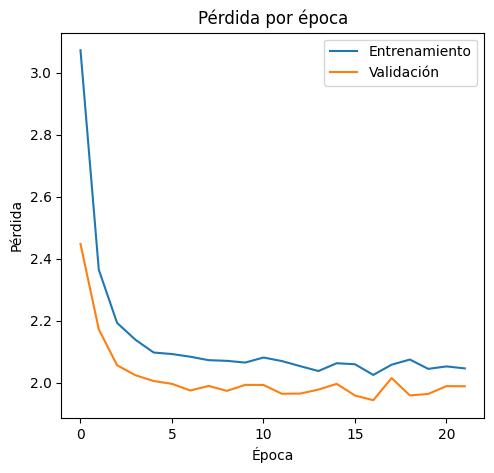

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Configuración de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con datos de validación
history = model.fit(X_train, y_train, epochs=100, batch_size=1500, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Obtener la pérdida y la precisión del entrenamiento y validación del historial
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Graficar la pérdida por época
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Entrenamiento')
plt.plot(val_loss, label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()


plt.show()



In [ ]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

90/90 [==============================] - 0s 3ms/step - loss: 1.9223 - accuracy: 0.3934
Loss: 1.922331690788269
Accuracy: 0.39335665106773376


In [ ]:

predictions = model.predict(X_test)
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=-1))

print("Predicted classes:", predicted_classes)
print("True classes:", df.loc[y_test.index, 'campo_unido'].values)


179/179 [==============================] - 1s 3ms/step
Predicted classes: ['Honda Accord' 'Honda Accord' 'Honda Accord' ... 'Honda Accord'
 'Honda Civic' 'Honda OdysseyEX-L']
True classes: ['Honda Pilot4WD' 'Honda CR-VEX-L' 'Honda Civic' ... 'Honda CR-VEX'
 'Honda OdysseyTouring' 'Honda Accord']


90/90 [==============================] - 0s 2ms/step


<ipython-input-32-071dcbb2b5eb>:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errors, shade=True)


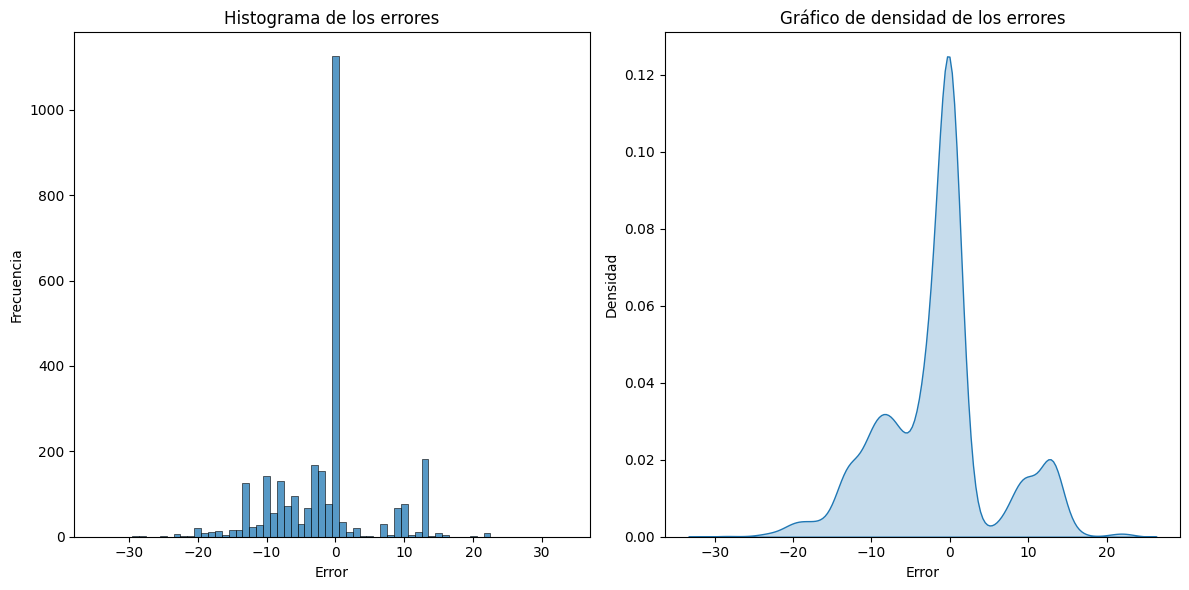

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Realizar predicciones con el modelo entrenado
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular los errores de predicción (diferencia entre predicción y etiqueta verdadera)
errors = y_pred_classes - y_test

# Crear un DataFrame para facilitar la visualización
errors_df = pd.DataFrame({'true_label': y_test, 'predicted_label': y_pred_classes, 'error': errors})

# Graficar la distribución de los errores
plt.figure(figsize=(12, 6))

# Histograma de los errores
plt.subplot(1, 2, 1)
sns.histplot(errors, bins=np.arange(-len(np.unique(y_test)), len(np.unique(y_test))+1)-0.5, kde=False)
plt.title('Histograma de los errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

# Gráfico de densidad de los errores
plt.subplot(1, 2, 2)
sns.kdeplot(errors, shade=True)
plt.title('Gráfico de densidad de los errores')
plt.xlabel('Error')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


90/90 [==============================] - 1s 5ms/step


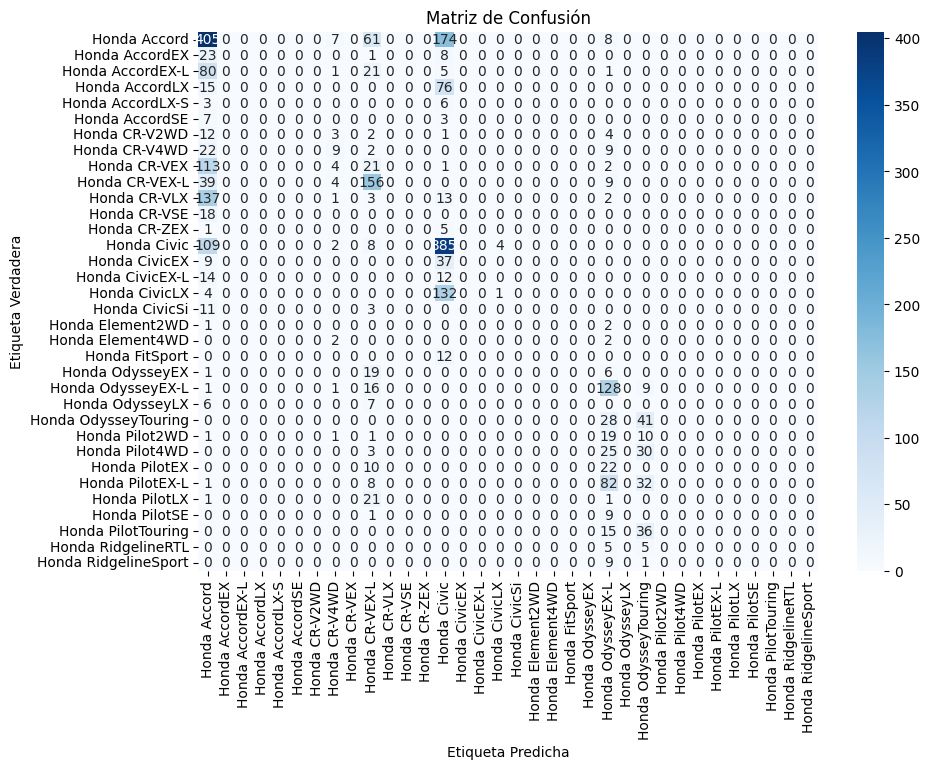

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supongamos que X_test y y_test son tus datos de prueba y etiquetas verdaderas
# X_test = ... (definido anteriormente)
# y_test = ... (definido anteriormente)

# Realizar predicciones con el modelo entrenado
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()
